# EXERCISE: Intro to machine learning

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
% matplotlib inline

import sklearn
sklearn.__version__

# Should be 0.18

'0.18'

## Read the data

`numpy` has a convenient function, `loadtxt` that can load a CSV file. It needs a file... and ours is on the web. That's OK, we don't need to download it, we can just read it by sending its text content to a `StringIO` object, which acts exactly like a file handle.

In [2]:
import requests
import io

r = requests.get('https://raw.githubusercontent.com/seg/2016-ml-contest/master/training_data.csv')
f = io.StringIO(r.text)

We can't just load it, because we only want NumPy to have to handle an array of floats and there's metadata in this file (we cna't tell that, I just happen to know it... and it's normal for CSV files). 

Let's look at the first few rows:

In [4]:
r.text.split('\n')[:5]

['Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS',
 '3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.0',
 '3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979',
 '3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.05,3.6,1,0.957',
 '3,A1 SH,SHRIMPLIN,2794.5,86.1,0.655,13.9,13.115,3.5,1,0.936']

For convenience later, we'll make a list of the features we're going to use.

In [5]:
features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']

In [6]:
cols = [4,5,6,7,8]
X = np.loadtxt(f, skiprows=1, delimiter=',', usecols=cols)

In [8]:
X.shape

(3232, 5)

We could do that... but Pandas is really convenient for this sort of data.

In [9]:
import pandas as pd

f.seek(0)

df = pd.read_csv(f)

df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Now we'll load the data we want. First the feature vectors, `X`. We'll just get the logs, which are in columns 4 to 8:

In [18]:
features

['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']

In [15]:
X = np.array(df[features])

In [17]:
X.shape

(3232, 5)

### Ex: Can you write the code to get the label vector, `y`?

In [19]:
y = np.array(df.Facies)

In [22]:
y.shape

(3232,)

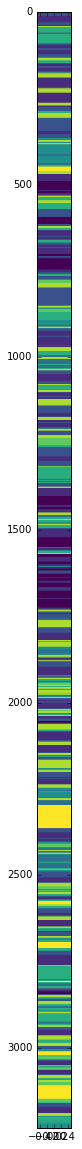

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(1, 20))
plt.imshow(np.array([y]).T, cmap='viridis', aspect=0.01)

Check that `X` is a 2D matrix with 3232 rows and 5 columns, and `y` is a 1D vector with 3232 elements.`

In [41]:
X.shape, y.shape

((3232, 5), (3232,))

We have data! Almost ready to train, we just have to get our test / train subsets sorted.

## Getting ready to train

In [43]:
from sklearn.model_selection import train_test_split

In [54]:
np.random.seed(42)
np.random.random(10)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.1
                                                   )

In [85]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2908, 5), (2908,), (324, 5), (324,))

### Ex: Use the docs for `train_test_split` to set the size of the test set, and also to set a random seed for the splitting.

Now the fun can really begin. 

## Training and evaluating a model

In [59]:
from sklearn.ensemble import ExtraTreesClassifier 

In [90]:
clf = ExtraTreesClassifier()

In [91]:
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [75]:
clf.score(X_test, y_test)

0.6476043276661515

### Ex: Try changing some hyperparameters, eg `verbose`, `n_estimators`, `n_jobs`, and `random_state`

In [86]:
clf = ExtraTreesClassifier(verbose=1, n_estimators=1000, n_jobs=-1, criterion='entropy')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished


0.73148148148148151

All models have the same API (but not the same hyperparameters), so it's very easy to try lots of models.

In [89]:
GaussianNB?

In [87]:
from sklearn.naive_bayes import GaussianNB
GaussianNB().fit(X_train, y_train).score(X_test, y_test)

0.4660493827160494

In [123]:
from sklearn.model_selection import GridSearchCV
etc = ExtraTreesClassifier()

parameters = {
    'n_estimators':[2000],
    'n_jobs': [4],
    'max_depth': [6],
    'min_samples_leaf':[6, 8, 10, 12]
}

clf = GridSearchCV(etc, parameters)
clf.fit(X, y)
r = pd.DataFrame(clf.cv_results_)

In [124]:
r.sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_n_estimators,param_n_jobs,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,4.196803,0.911020,0.484220,0.536194,6,10,2000,4,"{'n_jobs': 4, 'min_samples_leaf': 10, 'n_estim...",1,0.495370,0.520446,0.467967,0.554060,0.489302,0.534075,0.004862,0.059467,0.011754,0.013804
0,4.209440,0.908472,0.483601,0.547487,6,6,2000,4,"{'n_jobs': 4, 'min_samples_leaf': 6, 'n_estima...",2,0.494444,0.531134,0.466110,0.565197,0.490233,0.546129,0.018033,0.056556,0.012485,0.013939
1,4.301385,0.913638,0.483601,0.539441,6,8,2000,4,"{'n_jobs': 4, 'min_samples_leaf': 8, 'n_estima...",2,0.493519,0.522770,0.468895,0.555916,0.488372,0.539638,0.133178,0.062622,0.010607,0.013533
3,4.195045,0.879114,0.481126,0.531088,6,12,2000,4,"{'n_jobs': 4, 'min_samples_leaf': 12, 'n_estim...",4,0.490741,0.513941,0.468895,0.550348,0.483721,0.528975,0.003997,0.054683,0.009109,0.014938


In [111]:
sklearn.model_selection.GridSearchCV?

### Ex: Try lots of models!

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
KNeighborsClassifier().fit(X_train, y_train).score(X_test, y_test)

0.51543209876543206

## Predict!

In [103]:
y_pred = clf.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.63888888888888884

In [105]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[13,  8,  0,  0,  0,  1,  0,  0,  0],
       [ 2, 57, 15,  0,  0,  3,  0,  0,  0],
       [ 0, 16, 44,  0,  0,  2,  0,  0,  0],
       [ 0,  6,  2,  6,  0,  4,  0,  1,  0],
       [ 0,  4,  1,  0,  3, 13,  0,  2,  0],
       [ 0,  6,  0,  0,  0, 42,  0,  5,  0],
       [ 0,  5,  3,  0,  0,  0,  1,  3,  0],
       [ 0,  2,  1,  0,  0,  8,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  2, 13]])

In [107]:
target_names = [str(n) for n in set(y)]

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          1       0.87      0.59      0.70        22
          2       0.55      0.74      0.63        77
          3       0.67      0.71      0.69        62
          4       1.00      0.32      0.48        19
          5       1.00      0.13      0.23        23
          6       0.57      0.79      0.66        53
          7       1.00      0.08      0.15        12
          8       0.68      0.70      0.69        40
          9       0.93      0.81      0.87        16

avg / total       0.71      0.64      0.62       324



### What are precision, recall, and F1?

## More in-depth evaluation: k-fold cross-validation

We need a vector that contains an integer (or something) representing each unique well.

In [109]:
wells = df['Well Name']

In [110]:
from sklearn.model_selection import LeaveOneGroupOut

logo = LeaveOneGroupOut()
clf = ExtraTreesClassifier(random_state=0)

for train, test in logo.split(X, y, groups=wells):
    # train and test are the indices of the data to use.
    well_name = wells[test[0]]
    clf.fit(X[train], y[train])
    score = clf.score(X[test], y[test])
    print("{:>20s}  {:.3f}".format(well_name, score))

     CHURCHMAN BIBLE  0.460
      CROSS H CATTLE  0.315
            LUKE G U  0.388
               NEWBY  0.376
               NOLAN  0.352
          Recruit F9  0.868
             SHANKLE  0.419
           SHRIMPLIN  0.524


## Ex: Can you improve the model by adding more features? We didn't include some of them in this run (back in block 5).

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>